In [329]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

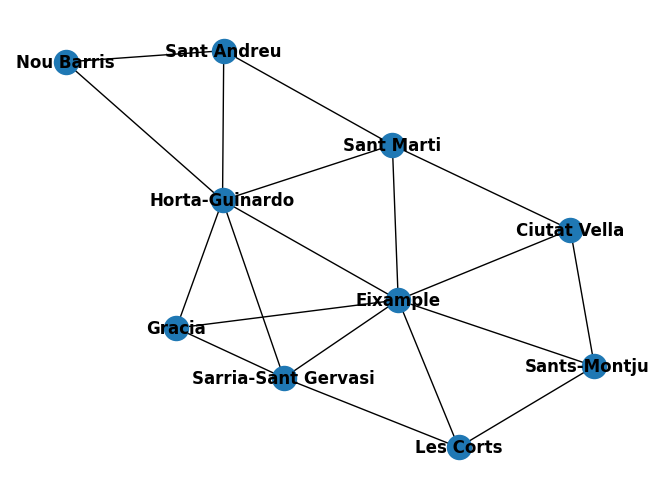

In [330]:
adjacency_dict = {
    "Sarria-Sant Gervasi": ("Les Corts", "Gracia", "Horta-Guinardo", "Eixample"),
    "Les Corts": ("Sarria-Sant Gervasi", "Sants-Montjuic", "Eixample"),
    "Gracia": ("Sarria-Sant Gervasi", "Eixample", "Horta-Guinardo"),
    "Sants-Montjuic": ("Les Corts", "Eixample", "Ciutat Vella"),
    "Eixample": ("Les Corts", "Gracia", "Sants-Montjuic", "Ciutat Vella", "Sant Marti", "Sarria-Sant Gervasi", "Horta-Guinardo"),
    "Ciutat Vella": ("Eixample", "Sant Marti", "Sants-Montjuic"),
    "Sant Marti": ("Eixample", "Ciutat Vella", "Sant Andreu", "Horta-Guinardo"),
    "Sant Andreu": ("Sant Marti", "Nou Barris", "Horta-Guinardo"),
    "Nou Barris": ("Sant Andreu", "Horta-Guinardo"),
    "Horta-Guinardo": ("Sarria-Sant Gervasi", "Gracia", "Nou Barris", "Sant Andreu", "Eixample", "Sant Marti")
}

H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
nx.draw(H, with_labels=True, font_weight='bold')


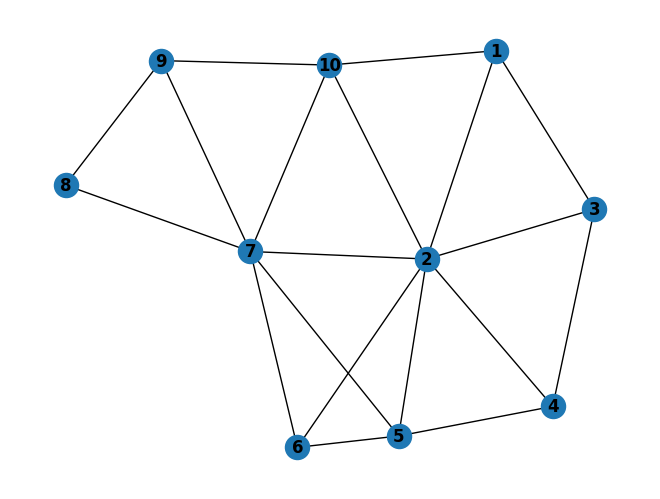

In [331]:
adjacency_dict_ids = {
    5: (4, 6, 7, 2),        # "Sarria-Sant Gervasi" -> ID 5
    4: (5, 3, 2),           # "Les Corts" -> ID 4
    6: (5, 2, 7),           # "Gracia" -> ID 6
    3: (4, 2, 1),           # "Sants-Montjuic" -> ID 3
    2: (4, 6, 3, 1, 10, 5, 7), # "Eixample" -> ID 2
    1: (2, 10, 3),          # "Ciutat Vella" -> ID 1
    10: (2, 1, 9, 7),       # "Sant Marti" -> ID 10
    9: (10, 8, 7),          # "Sant Andreu" -> ID 9
    8: (9, 7),              # "Nou Barris" -> ID 8
    7: (5, 6, 8, 9, 2, 10)  # "Horta-Guinardo" -> ID 7
}

H = nx.Graph(adjacency_dict_ids)  # create a Graph dict mapping nodes to nbrs
nx.draw(H, with_labels=True, font_weight='bold')

In [332]:
district_id_to_name = {
    1: "Ciutat Vella",
    2: "Eixample",
    3: "Sants-Montjuic",
    4: "Les Corts",
    5: "Sarria-Sant Gervasi",
    6: "Gracia",
    7: "Horta-Guinardo",
    8: "Nou Barris",
    9: "Sant Andreu",
    10: "Sant Marti"
}

district_name_to_id = {
    "Ciutat Vella": 1,
    "Eixample": 2,
    "Sants-Montjuic": 3,
    "Les Corts": 4,
    "Sarria-Sant Gervasi": 5,
    "Gracia": 6,
    "Horta-Guinardo": 7,
    "Nou Barris": 8,
    "Sant Andreu": 9,
    "Sant Marti": 10
}

In [333]:
df = pd.read_csv('../data/local_data/merged_cleaned_data.csv')
display(df.head())

,Census Section,District,Date,Use,Number of Meters,Accumulated Consumption,Max Temperature,Min Temperature,Precipitation,Tourist Accommodations,Hotel Overnight Stays
0,801901001,1,2021-01-01,Commercial,56,2710,7.55,4.30,5.65,1775.0,4411
1,801901001,1,2021-01-01,Domestic,322,10058,7.55,4.30,5.65,1775.0,4411
2,801901001,1,2021-01-01,Industrial,10,140646,7.55,4.30,5.65,1775.0,4411
3,801901001,1,2021-01-02,Commercial,56,3573,8.55,1.55,0.00,4646.0,11547
4,801901001,1,2021-01-02,Domestic,322,9600,8.55,1.55,0.00,4646.0,11547


In [334]:
# df["District"] = df["District"].apply(lambda column: district_id_to_name[column])
# display(df.head())

In [335]:
df = df.drop("Census Section", axis=1)
df = df.drop("Use", axis=1)
df = df.drop("Tourist Accommodations", axis=1)
df = df.drop("Hotel Overnight Stays", axis=1)
display(df.head())


,District,Date,Number of Meters,Accumulated Consumption,Max Temperature,Min Temperature,Precipitation
0,1,2021-01-01,56,2710,7.55,4.30,5.65
1,1,2021-01-01,322,10058,7.55,4.30,5.65
2,1,2021-01-01,10,140646,7.55,4.30,5.65
3,1,2021-01-02,56,3573,8.55,1.55,0.00
4,1,2021-01-02,322,9600,8.55,1.55,0.00


In [336]:
univariate_df = df.groupby(['Date']).agg(
    n_meters=('Number of Meters', 'sum'),
    accumulated_consumption=('Accumulated Consumption', 'sum'),
    max_temperature=('Max Temperature', 'first'), 
    min_temperature=('Min Temperature', 'first'), 
    precipitation=('Precipitation', 'first')
).reset_index()

In [337]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby(['Date', 'District']).agg(
    # accumulated_meters=('Number of Meters', 'sum'),
    accumulated_consumption=('Accumulated Consumption', 'sum'),
    max_temperature=('Max Temperature', 'first'), 
    min_temperature=('Min Temperature', 'first'), 
    precipitation=('Precipitation', 'first')  
).reset_index()

In [338]:
districts = df['District'].unique()
dates = df['Date'].unique()

In [339]:
district_data = {district: df[df['District'] == district].set_index('Date').drop("District", axis=1) for district in districts}

In [340]:
display(district_data[1])

,accumulated_consumption,max_temperature,min_temperature,precipitation
Date,,,,
2021-01-01,3351357,7.55,4.30,5.65
2021-01-02,2844646,8.55,1.55,0.00
2021-01-03,2693112,9.55,0.85,0.00
2021-01-04,2901003,10.10,0.65,0.00
2021-01-05,2873800,9.40,0.65,0.00
...,...,...,...,...
2023-12-27,6454331,17.90,6.80,0.00
2023-12-28,6642302,14.35,5.80,0.00
2023-12-29,6738023,14.00,7.20,0.00


In [341]:
display(district_data[1].iloc[-90:])

,accumulated_consumption,max_temperature,min_temperature,precipitation
Date,,,,
2023-10-03,7656597,26.75,18.85,0.0
2023-10-04,7821181,27.30,20.45,0.0
2023-10-05,7598801,26.20,20.05,0.0
2023-10-06,7716585,26.95,19.25,0.0
2023-10-07,7338357,26.75,19.15,0.0
...,...,...,...,...
2023-12-27,6454331,17.90,6.80,0.0
2023-12-28,6642302,14.35,5.80,0.0
2023-12-29,6738023,14.00,7.20,0.0


In [342]:
test_size = 90
X_train = {}
X_test = {}

for district in districts:
    district_df = district_data[district]
    train_features = district_df.iloc[:-test_size].values
    test_features = district_df.iloc[-test_size:]["accumulated_consumption"].values
    X_train[district] = train_features
    X_test[district] = test_features

In [343]:
temporal_features = {}
for district in districts:
    district_df = district_data[district]
    features = district_df.values
    temporal_features[district] = features

In [344]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class STGNN(nn.Module):
    def __init__(self, num_features, hidden_channels, num_timesteps):
        super(STGNN, self).__init__()
        
        # Single Graph convolution layer instead of two
        self.gcn = GCNConv(num_features, hidden_channels)
        
        # LSTM layer to capture temporal dependencies
        self.lstm = nn.LSTM(hidden_channels, hidden_channels, batch_first=True)  # LSTM input size matches hidden_channels
        
        # Fully connected layer to predict future consumption (next 90 days)
        self.fc = nn.Linear(hidden_channels, 90)  # Output 90 values for each district (next 90 days of consumption)

    def forward(self, data, temporal_data):
        # Spatial modeling using GCN layer
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.gcn(x, edge_index))  # Use only one GCN layer
        
        # Reshape x to be compatible with LSTM (batch_size, num_nodes, hidden_channels)
        # x is of shape [num_districts, num_nodes, hidden_channels] after GCN
        x = x.view(x.size(0), -1, x.size(-1))  # Reshape to [num_districts, num_nodes, hidden_channels]
        
        # Temporal modeling using LSTM
        # Temporal data needs to match the format (batch_size, seq_len, feature_size)
        x, _ = self.lstm(x)  # LSTM expects [batch_size, seq_len, feature_size]
        
        # Output consumption for the next 90 days: we take the output of the last time step
        x = x[:, -1, :]  # Get the output from the last time step
        
        # Pass through the fully connected layer to get the prediction for the next 90 days
        x = self.fc(x)  # shape: (num_districts, 90)
        
        return x


In [345]:
print(X_test)

{np.int64(1): array([7656597, 7821181, 7598801, 7716585, 7338357, 7247424, 7614696,
       7178211, 7646357, 7149434, 7539953, 7107973, 6748100, 7185906,
       7558792, 7464590, 7868798, 7805502, 7333315, 7043015, 7493627,
       6950685, 7113697, 7202819, 7526679, 7119884, 7257847, 7548632,
       7158227, 6827793, 7115317, 7255795, 6976016, 6842818, 7301088,
       6916389, 7200618, 7135944, 7531794, 6915652, 6653127, 7138122,
       6840618, 6900531, 7337033, 7304552, 7039031, 6906566, 7085414,
       6702324, 6758410, 6971687, 7228527, 6788567, 6406475, 6699461,
       6659411, 6724834, 6597409, 6693517, 6516386, 6207422, 6496831,
       6152006, 5888056, 6635295, 6372008, 6444765, 5925184, 6186208,
       5793120, 6107030, 6455704, 6493725, 6470762, 6347129, 6229382,
       6284847, 6350862, 6295051, 6252747, 5935947, 5682905, 5465361,
       5826946, 6454331, 6642302, 6738023, 6779402, 6763916]), np.int64(2): array([11003330, 11057744, 10978277, 11049955, 10218466,  9315342,
   

In [346]:
from torch_geometric.data import Data

# Create the edge index from the adjacency graph H
edge_index = torch.tensor(list(H.edges), dtype=torch.long).t().contiguous()

# Example: Suppose you have 10 districts and 100 time steps with 4 features per district
num_districts = len(districts)
num_timesteps = len(dates) - test_size
num_features = 4  # Accumulated Consumption, Max Temperature, Min Temperature, Precipitation

temporal_data = np.zeros((num_districts, num_timesteps, num_features))
for i, district in enumerate(districts):
    temporal_data[i] = X_train[district]  

# Convert temporal data to tensor
temporal_data_tensor = torch.tensor(temporal_data, dtype=torch.float)

test_temporal_data = np.zeros((num_districts, test_size))
for i, district in enumerate(districts):
    test_temporal_data[i] = X_test[district]

# Convert temporal data to tensor
test_temporal_data_tensor = torch.tensor(test_temporal_data, dtype=torch.float)

# Create the graph data object
graph_data = Data(x=temporal_data_tensor, edge_index=edge_index)


In [347]:
print(temporal_data_tensor.shape)

torch.Size([10, 1005, 4])


In [348]:
print(torch.tensor(list(H.edges), dtype=torch.long).t().contiguous())

tensor([[ 5,  5,  5,  5,  4,  4,  6,  6,  3,  3,  2,  2,  2,  1, 10, 10,  9,  9,
          8],
        [ 4,  6,  7,  2,  3,  2,  2,  7,  2,  1,  1, 10,  7, 10,  9,  7,  8,  7,
          7]])


In [349]:
num_epochs = 100

model = STGNN(num_features=4, hidden_channels=64, num_timesteps=num_timesteps)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(graph_data, temporal_data_tensor)
    loss = loss_fn(output, test_temporal_data_tensor)  # Define target (e.g., future consumption)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 39448637079552.0
Epoch 2, Loss: 39448637079552.0
Epoch 3, Loss: 39448637079552.0
Epoch 4, Loss: 39448637079552.0
Epoch 5, Loss: 39448637079552.0
Epoch 6, Loss: 39448637079552.0
Epoch 7, Loss: 39448637079552.0
Epoch 8, Loss: 39448637079552.0
Epoch 9, Loss: 39448637079552.0
Epoch 10, Loss: 39448637079552.0
Epoch 11, Loss: 39448637079552.0
Epoch 12, Loss: 39448637079552.0
Epoch 13, Loss: 39448637079552.0
Epoch 14, Loss: 39448637079552.0
Epoch 15, Loss: 39448637079552.0
Epoch 16, Loss: 39448628690944.0
Epoch 17, Loss: 39448628690944.0
Epoch 18, Loss: 39448628690944.0
Epoch 19, Loss: 39448628690944.0
Epoch 20, Loss: 39448628690944.0
Epoch 21, Loss: 39448628690944.0
Epoch 22, Loss: 39448628690944.0
Epoch 23, Loss: 39448628690944.0
Epoch 24, Loss: 39448628690944.0
Epoch 25, Loss: 39448628690944.0
Epoch 26, Loss: 39448628690944.0
Epoch 27, Loss: 39448628690944.0
Epoch 28, Loss: 39448628690944.0
Epoch 29, Loss: 39448628690944.0
Epoch 30, Loss: 39448628690944.0
Epoch 31, Loss: 394

In [350]:
print(output)

tensor([[2.1706, 1.9836, 1.1781, 1.7785, 2.2085, 1.2851, 1.0424, 1.6527, 1.3073,
         1.7701, 1.3981, 1.4848, 1.1959, 1.3092, 1.8020, 1.6733, 1.5228, 1.6571,
         1.5403, 1.0003, 1.8183, 1.7210, 1.1735, 1.6153, 1.8992, 1.7600, 1.9157,
         2.1369, 1.1746, 1.3800, 1.6256, 1.6954, 1.2793, 1.6722, 1.8601, 1.6981,
         1.5893, 1.9985, 1.7080, 1.5558, 1.8089, 1.7089, 1.8925, 1.8823, 1.1883,
         1.7429, 1.6853, 1.3572, 1.8040, 1.6805, 1.2189, 1.6771, 1.4867, 1.2478,
         1.5772, 1.4524, 1.8590, 2.0768, 2.4250, 1.4206, 1.8111, 2.2317, 0.9205,
         1.5241, 1.5665, 1.4273, 1.6178, 1.8415, 1.2682, 1.9301, 1.4722, 1.2734,
         1.7249, 1.6342, 1.5348, 1.7349, 1.6359, 1.3583, 1.8296, 1.4259, 2.0131,
         1.5298, 1.7976, 1.8997, 1.6224, 1.7790, 1.8956, 1.4131, 1.4081, 2.0748],
        [2.1706, 1.9836, 1.1781, 1.7785, 2.2085, 1.2851, 1.0424, 1.6527, 1.3073,
         1.7701, 1.3981, 1.4848, 1.1959, 1.3092, 1.8020, 1.6733, 1.5228, 1.6571,
         1.5403, 1.0003, 1.

In [351]:
print(test_temporal_data_tensor.shape)

torch.Size([10, 90])


## LSTM for water consumption

#### Univariate forecasting

In [352]:
import seaborn as sns

,Date,n_meters,accumulated_consumption,max_temperature,min_temperature,precipitation
0,2021-01-01,378082,18394456,7.55,4.30,5.65
1,2021-01-02,378411,20091403,8.55,1.55,0.00
2,2021-01-03,378465,19885438,9.55,0.85,0.00
3,2021-01-04,378651,23769857,10.10,0.65,0.00
4,2021-01-05,378848,23327454,9.40,0.65,0.00
...,...,...,...,...,...,...
1090,2023-12-27,714467,52009577,17.90,6.80,0.00
1091,2023-12-28,714853,53169138,14.35,5.80,0.00
1092,2023-12-29,715167,52245782,14.00,7.20,0.00
1093,2023-12-30,715459,48213965,16.35,6.00,0.00


<Axes: >

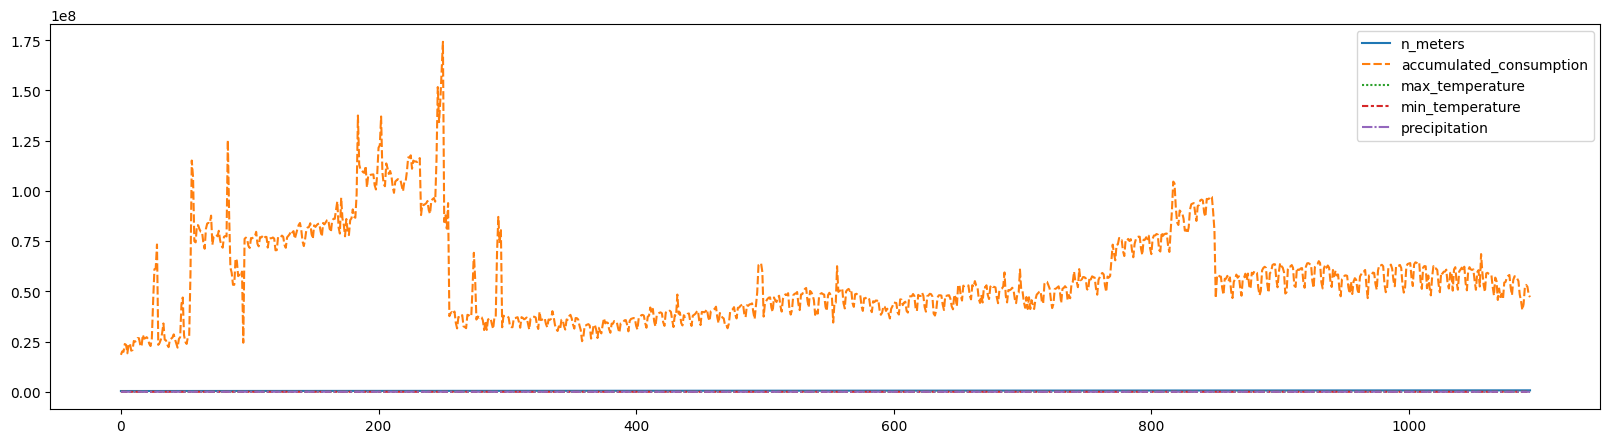

In [359]:
display(univariate_df)
plt.figure(figsize=(20,5))
sns.lineplot(data=univariate_df)

In [398]:
display(univariate_df.head(20))

,Date,n_meters,accumulated_consumption,max_temperature,min_temperature,precipitation
0,2021-01-01,378082,18394456,7.55,4.30,5.65
1,2021-01-02,378411,20091403,8.55,1.55,0.00
2,2021-01-03,378465,19885438,9.55,0.85,0.00
3,2021-01-04,378651,23769857,10.10,0.65,0.00
4,2021-01-05,378848,23327454,9.40,0.65,0.00
5,2021-01-06,378865,19148336,9.70,0.25,0.50
6,2021-01-07,378948,23736882,6.35,2.25,0.00
7,2021-01-08,379105,23989732,6.10,0.50,5.10
8,2021-01-09,379133,20441085,6.15,1.50,12.40
9,2021-01-10,379100,20764724,6.65,3.60,6.00


In [366]:
def generate_sequences(data, sequence_length, target_feature):
    n_samples = data.shape[0] - sequence_length
    n_features = data.shape[1] - 1 # Exclude the target column from the input features
    X  = np.zeros((n_samples, sequence_length, n_features))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        X[i] = data.iloc[i:i+sequence_length].drop(target_feature, axis=1).to_numpy()
        y[i] = data[target_feature].iloc[i+sequence_length - 1]

    return X, y

In [386]:
def generate_sequences(data, target_data, sequence_length):
    n_samples = data.shape[0] - sequence_length
    n_features = data.shape[1] # Exclude the target column from the input features
    X  = np.zeros((n_samples, sequence_length, n_features))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        X[i] = data.iloc[i:i+sequence_length].to_numpy()
        y[i] = target_data.iloc[i+sequence_length - 1]

    return X, y

In [383]:
from sklearn.preprocessing import MinMaxScaler

data_x = univariate_df[["n_meters", "max_temperature", "min_temperature", "precipitation"]]
data_y = univariate_df[["accumulated_consumption"]]

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()

# Apply the scaler to the entire dataset
scaled_x = scaler_x.fit_transform(data_x)

# Convert the scaled numpy array back to a pandas dataframe
scaled_x_df = pd.DataFrame(scaled_x, columns=data_x.columns)

# Initialize the MinMaxScaler
scaler_y = MinMaxScaler()

# Apply the scaler to the entire dataset
scaled_y = scaler_y.fit_transform(data_y)

# Convert the scaled numpy array back to a pandas dataframe
scaled_y_df = pd.DataFrame(scaled_y, columns=data_y.columns)

In [375]:
print(univariate_df[["n_meters", "accumulated_consumption", "max_temperature", "min_temperature", "precipitation"]])

      n_meters  accumulated_consumption  max_temperature  min_temperature  \
0       378082                 18394456             7.55             4.30   
1       378411                 20091403             8.55             1.55   
2       378465                 19885438             9.55             0.85   
3       378651                 23769857            10.10             0.65   
4       378848                 23327454             9.40             0.65   
...        ...                      ...              ...              ...   
1090    714467                 52009577            17.90             6.80   
1091    714853                 53169138            14.35             5.80   
1092    715167                 52245782            14.00             7.20   
1093    715459                 48213965            16.35             6.00   
1094    715377                 47109395            16.65             7.35   

      precipitation  
0              5.65  
1              0.00  
2        

In [376]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df[["n_meters", "accumulated_consumption", "max_temperature", "min_temperature", "precipitation"]]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the entire dataset
scaled_data = scaler.fit_transform(data)

# Convert the scaled numpy array back to a pandas dataframe
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

In [378]:
display(scaled_data_df)

,n_meters,accumulated_consumption,max_temperature,min_temperature,precipitation
0,0.000000,0.000000,0.047002,0.150268,0.153951
1,0.000975,0.010893,0.079417,0.051878,0.000000
2,0.001135,0.009571,0.111831,0.026834,0.000000
3,0.001687,0.034507,0.129660,0.019678,0.000000
4,0.002270,0.031667,0.106969,0.019678,0.000000
...,...,...,...,...,...
1090,0.997060,0.215790,0.382496,0.239714,0.000000
1091,0.998204,0.223234,0.267423,0.203936,0.000000
1092,0.999134,0.217306,0.256078,0.254025,0.000000
1093,1.000000,0.191424,0.332253,0.211091,0.000000


In [379]:
X, y = generate_sequences(scaled_data_df, 90, "accumulated_consumption")

In [387]:
X, y = generate_sequences(scaled_x_df, scaled_y_df, 90)

/tmp/ipykernel_41862/3434198493.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y[i] = target_data.iloc[i+sequence_length - 1]


In [390]:
print(X.shape)

(1005, 90, 4)


Epoch [1/1000], Loss: 0.0244
Epoch [2/1000], Loss: 0.0183
Epoch [3/1000], Loss: 0.0181
Epoch [4/1000], Loss: 0.0170
Epoch [5/1000], Loss: 0.0193
Epoch [6/1000], Loss: 0.0171
Epoch [7/1000], Loss: 0.0169
Epoch [8/1000], Loss: 0.0170
Epoch [9/1000], Loss: 0.0162
Epoch [10/1000], Loss: 0.0187
Epoch [11/1000], Loss: 0.0159
Epoch [12/1000], Loss: 0.0150
Epoch [13/1000], Loss: 0.0153
Epoch [14/1000], Loss: 0.0140
Epoch [15/1000], Loss: 0.0111
Epoch [16/1000], Loss: 0.0078
Epoch [17/1000], Loss: 0.0075
Epoch [18/1000], Loss: 0.0072
Epoch [19/1000], Loss: 0.0074
Epoch [20/1000], Loss: 0.0078
Epoch [21/1000], Loss: 0.0077
Epoch [22/1000], Loss: 0.0076
Epoch [23/1000], Loss: 0.0070
Epoch [24/1000], Loss: 0.0072
Epoch [25/1000], Loss: 0.0072
Epoch [26/1000], Loss: 0.0073
Epoch [27/1000], Loss: 0.0073
Epoch [28/1000], Loss: 0.0073
Epoch [29/1000], Loss: 0.0075
Epoch [30/1000], Loss: 0.0075
Epoch [31/1000], Loss: 0.0071
Epoch [32/1000], Loss: 0.0067
Epoch [33/1000], Loss: 0.0069
Epoch [34/1000], Lo

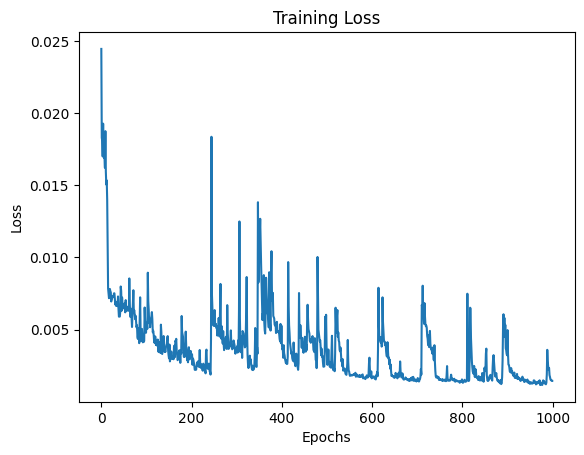

Test Loss: 0.0009
Predictions (first 5): [0.27829474 0.21624014 0.29164687 0.18603215 0.11494538]
True values (first 5): [0.25330064 0.23312242 0.32382888 0.13549808 0.13942052]


In [391]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Make y a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the LSTM model for regression
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer to output regression

    def forward(self, x):
        # x is of shape (batch_size, sequence_length, input_size)
        _, (hn, _) = self.lstm(x)  # Get the last hidden state
        out = self.fc(hn[-1])  # Use the last hidden state to predict
        return out

# Model hyperparameters
input_size = 4  # Number of features at each time step
hidden_size = 50  # LSTM hidden state size
output_size = 1  # Single value for regression

# Instantiate the model
model = LSTMRegressor(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
batch_size = 32

train_loss_history = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))  # Shuffle the training data
    epoch_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        # Get the batch
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / (X_train.size(0) // batch_size)
    train_loss_history.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

# Plot training loss
plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

    test_predictions_rescaled = scaler_y.inverse_transform(test_predictions.detach().numpy())

    # Display some predictions
    print("Predictions (first 5):", test_predictions[:5].squeeze().numpy())
    print("True values (first 5):", y_test[:5].squeeze().numpy())


Test Loss: 0.0009
Predictions (first 5): [61746376. 52079696. 63826328. 47373984. 36300304.]
True values (first 5): [57852868. 54709564. 68839544. 39501940. 40112964.]


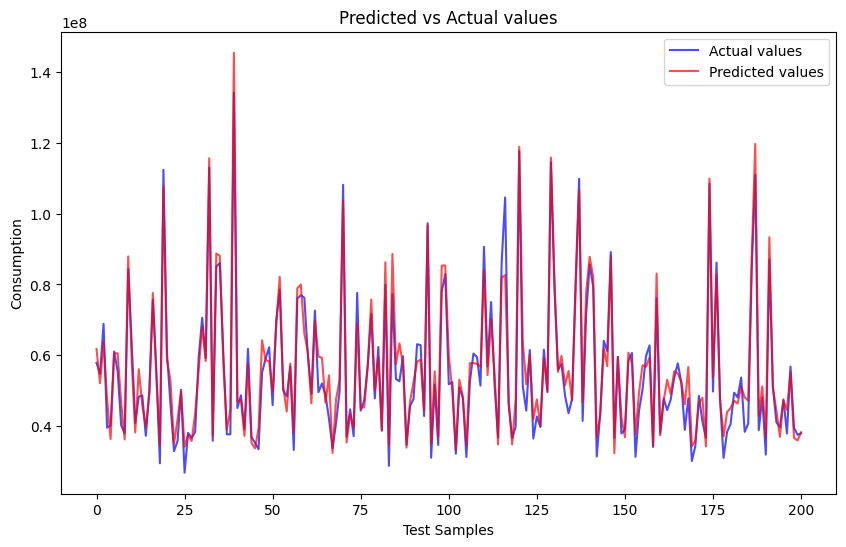

In [397]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

    test_predictions_rescaled = scaler_y.inverse_transform(test_predictions.detach().numpy())
    test_rescaled = scaler_y.inverse_transform(y_test.detach().numpy())

    # Display some predictions
    print("Predictions (first 5):", test_predictions_rescaled[:5].squeeze())
    print("True values (first 5):", test_rescaled[:5].squeeze())

        # Visualize the results: Predicted vs Actual
    plt.figure(figsize=(10, 6))

    # Plotting the predicted values against the actual values
    plt.plot(test_rescaled, label='Actual values', color='blue', alpha=0.7)
    plt.plot(test_predictions_rescaled, label='Predicted values', color='red', alpha=0.7)
    
    # Adding labels and title
    plt.title('Predicted vs Actual values')
    plt.xlabel('Test Samples')
    plt.ylabel('Consumption')
    plt.legend()

    # Show the plot
    plt.show()

## LSTM 1.0 (1-day prediction)

In [38]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
def generate_sequences(data, target_data, sequence_length):
    n_samples = data.shape[0] - sequence_length
    n_features = data.shape[1] # Exclude the target column from the input features
    X  = np.zeros((n_samples, sequence_length, n_features))
    y = np.zeros(n_samples)
    for i in range(n_samples):
        X[i] = data.iloc[i:i+sequence_length].to_numpy()
        y[i] = target_data.iloc[i+sequence_length - 1]

    return X, y

In [40]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer to output regression

    def forward(self, x):
        # x is of shape (batch_size, sequence_length, input_size)
        x, _ = self.lstm(x)  # Get the last hidden state
        out = self.fc(x[:,-1,:])  # Use the last hidden state to predict
        return out

In [41]:
df = pd.read_csv('../data/local_data/merged_cleaned_data_NEW.csv')

df = df.drop("Census Section", axis=1)
df = df.drop("Use", axis=1)

df = df.groupby(['Date']).agg(
    n_meters=('Number of Meters', 'sum'),
    accumulated_consumption=('Accumulated Consumption', 'sum'),
    max_temperature=('temp_max', 'first'), 
    min_temperature=('temp_min', 'first'), 
    precipitation=('precipitacion', 'first'),
    pernoctacion=('pernoctacions', 'first')
).reset_index()

df = df.set_index("Date")
display(df)

,n_meters,accumulated_consumption,max_temperature,min_temperature,precipitation,pernoctacion
Date,,,,,,
2021-01-01,378082,18394456,9.47,6.27,3.37,6186
2021-01-02,378411,20091403,10.07,3.77,0.00,16193
2021-01-03,378465,19885438,9.93,3.37,0.00,10984
2021-01-04,378651,23769857,11.07,2.30,0.00,15115
2021-01-05,378848,23327454,10.10,2.47,0.00,15962
...,...,...,...,...,...,...
2023-12-27,714467,52009577,16.43,4.87,0.00,94242
2023-12-28,714853,53169138,14.97,5.73,0.00,98716
2023-12-29,715167,52245782,13.90,6.87,0.00,109316


In [42]:
data_x = df[["n_meters", "max_temperature", "min_temperature", "precipitation", "pernoctacion"]]
display(data_x)

,n_meters,max_temperature,min_temperature,precipitation,pernoctacion
Date,,,,,
2021-01-01,378082,9.47,6.27,3.37,6186
2021-01-02,378411,10.07,3.77,0.00,16193
2021-01-03,378465,9.93,3.37,0.00,10984
2021-01-04,378651,11.07,2.30,0.00,15115
2021-01-05,378848,10.10,2.47,0.00,15962
...,...,...,...,...,...
2023-12-27,714467,16.43,4.87,0.00,94242
2023-12-28,714853,14.97,5.73,0.00,98716
2023-12-29,715167,13.90,6.87,0.00,109316


In [43]:
data_y = df[["accumulated_consumption"]]
display(data_y)

,accumulated_consumption
Date,
2021-01-01,18394456
2021-01-02,20091403
2021-01-03,19885438
2021-01-04,23769857
2021-01-05,23327454
...,...
2023-12-27,52009577
2023-12-28,53169138
2023-12-29,52245782


In [44]:
# Scale the input features
scaler_x = MinMaxScaler()
scaled_x = scaler_x.fit_transform(data_x)
scaled_x_df = pd.DataFrame(scaled_x, columns=data_x.columns)

# Scale the target features
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(data_y)
scaled_y_df = pd.DataFrame(scaled_y, columns=data_y.columns)

In [45]:
# Generate the sequences of input values - target
n = 90 # Number of inputs used to predict the next day
X, y = generate_sequences(scaled_x_df, scaled_y_df, n)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Make y a column vector

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

/tmp/ipykernel_31406/3434198493.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y[i] = target_data.iloc[i+sequence_length - 1]


#### Training

Epoch [1/1000], Loss: 0.0400
Epoch [2/1000], Loss: 0.0215
Epoch [3/1000], Loss: 0.0188
Epoch [4/1000], Loss: 0.0171
Epoch [5/1000], Loss: 0.0150
Epoch [6/1000], Loss: 0.0148
Epoch [7/1000], Loss: 0.0130
Epoch [8/1000], Loss: 0.0119
Epoch [9/1000], Loss: 0.0123
Epoch [10/1000], Loss: 0.0164
Epoch [11/1000], Loss: 0.0149
Epoch [12/1000], Loss: 0.0112
Epoch [13/1000], Loss: 0.0110
Epoch [14/1000], Loss: 0.0088
Epoch [15/1000], Loss: 0.0081
Epoch [16/1000], Loss: 0.0089
Epoch [17/1000], Loss: 0.0097
Epoch [18/1000], Loss: 0.0095
Epoch [19/1000], Loss: 0.0096
Epoch [20/1000], Loss: 0.0082
Epoch [21/1000], Loss: 0.0069
Epoch [22/1000], Loss: 0.0080
Epoch [23/1000], Loss: 0.0080
Epoch [24/1000], Loss: 0.0083
Epoch [25/1000], Loss: 0.0088
Epoch [26/1000], Loss: 0.0091
Epoch [27/1000], Loss: 0.0077
Epoch [28/1000], Loss: 0.0071
Epoch [29/1000], Loss: 0.0071
Epoch [30/1000], Loss: 0.0061
Epoch [31/1000], Loss: 0.0061
Epoch [32/1000], Loss: 0.0065
Epoch [33/1000], Loss: 0.0055
Epoch [34/1000], Lo

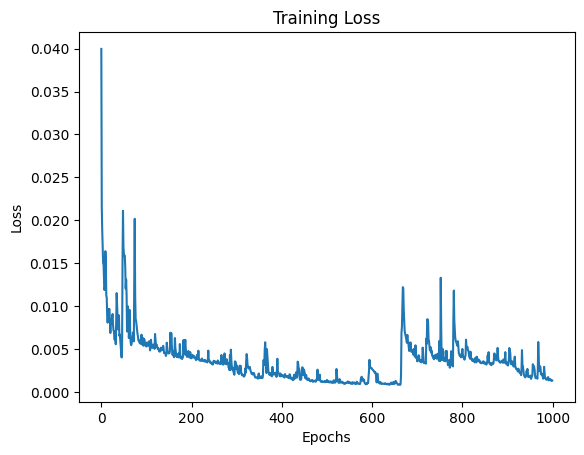

In [46]:
# Model hyperparameters
input_size = data_x.shape[1]  # Number of features at each time step
hidden_size = 50  # LSTM hidden state size
output_size = 1  # Single value for regression

# Instantiate the model
model = LSTMRegressor(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
batch_size = 32

train_loss_history = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))  # Shuffle the training data
    epoch_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        # Get the batch
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / (X_train.size(0) // batch_size)
    train_loss_history.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

# Plot training loss
plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Evaluation

Test Loss: 0.0007
Predictions (first 5): [65925636. 52541928. 69793808. 45696044. 39447516.]
True values (first 5): [57852868. 54709564. 68839544. 39501940. 40112964.]


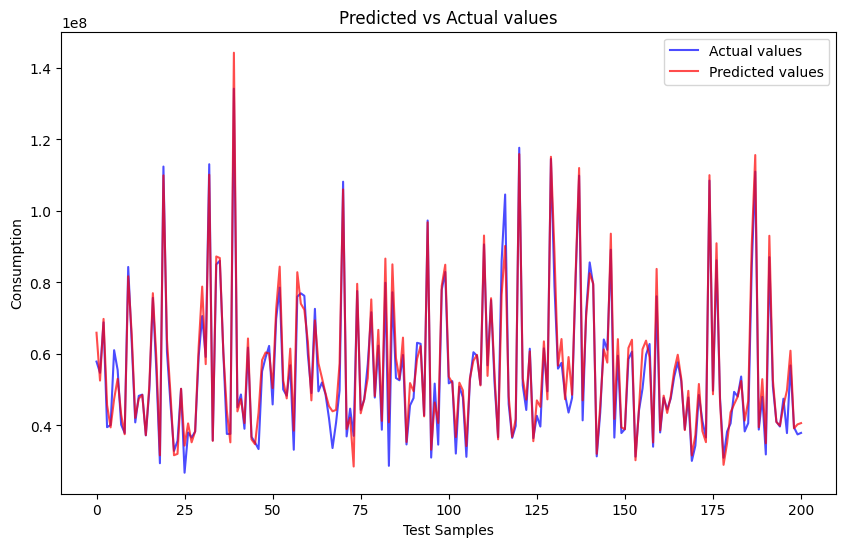

In [47]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

    test_predictions_rescaled = scaler_y.inverse_transform(test_predictions.detach().numpy())
    test_rescaled = scaler_y.inverse_transform(y_test.detach().numpy())

    # Display some predictions
    print("Predictions (first 5):", test_predictions_rescaled[:5].squeeze())
    print("True values (first 5):", test_rescaled[:5].squeeze())

        # Visualize the results: Predicted vs Actual
    plt.figure(figsize=(10, 6))

    # Plotting the predicted values against the actual values
    plt.plot(test_rescaled, label='Actual values', color='blue', alpha=0.7)
    plt.plot(test_predictions_rescaled, label='Predicted values', color='red', alpha=0.7)
    
    # Adding labels and title
    plt.title('Predicted vs Actual values')
    plt.xlabel('Test Samples')
    plt.ylabel('Consumption')
    plt.legend()

    # Show the plot
    plt.show()

## LSTM 1.0 (n-day prediction)

In [48]:
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
def generate_sequences(data, target_data, past_sequence_length, future_sequence_length):
    n_samples = data.shape[0] - (past_sequence_length + future_sequence_length) + 1
    n_features = data.shape[1]
    X  = np.zeros((n_samples, past_sequence_length, n_features))
    y = np.zeros((n_samples, future_sequence_length))
    for i in range(n_samples):
        X[i] = data.iloc[i:i+past_sequence_length].to_numpy()
        y[i] = target_data.iloc[i:i+future_sequence_length].to_numpy().squeeze()

    return X, y

In [50]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer to output regression

    def forward(self, x):
        # x is of shape (batch_size, sequence_length, input_size)
        x, _ = self.lstm(x)  # Get the last hidden state
        out = self.fc(x[:,-90:,:])  # Use the last hidden state to predict
        return out

In [51]:
df = pd.read_csv('../data/local_data/merged_cleaned_data_NEW.csv')

df = df.drop("Census Section", axis=1)
df = df.drop("Use", axis=1)

df = df.groupby(['Date']).agg(
    n_meters=('Number of Meters', 'sum'),
    accumulated_consumption=('Accumulated Consumption', 'sum'),
    max_temperature=('temp_max', 'first'), 
    min_temperature=('temp_min', 'first'), 
    precipitation=('precipitacion', 'first'),
    pernoctacion=('pernoctacions', 'first')
).reset_index()

df = df.set_index("Date")
display(df)

,n_meters,accumulated_consumption,max_temperature,min_temperature,precipitation,pernoctacion
Date,,,,,,
2021-01-01,378082,18394456,9.47,6.27,3.37,6186
2021-01-02,378411,20091403,10.07,3.77,0.00,16193
2021-01-03,378465,19885438,9.93,3.37,0.00,10984
2021-01-04,378651,23769857,11.07,2.30,0.00,15115
2021-01-05,378848,23327454,10.10,2.47,0.00,15962
...,...,...,...,...,...,...
2023-12-27,714467,52009577,16.43,4.87,0.00,94242
2023-12-28,714853,53169138,14.97,5.73,0.00,98716
2023-12-29,715167,52245782,13.90,6.87,0.00,109316


In [52]:
data_x = df[["n_meters", "max_temperature", "min_temperature", "precipitation", "pernoctacion"]]
display(data_x)

,n_meters,max_temperature,min_temperature,precipitation,pernoctacion
Date,,,,,
2021-01-01,378082,9.47,6.27,3.37,6186
2021-01-02,378411,10.07,3.77,0.00,16193
2021-01-03,378465,9.93,3.37,0.00,10984
2021-01-04,378651,11.07,2.30,0.00,15115
2021-01-05,378848,10.10,2.47,0.00,15962
...,...,...,...,...,...
2023-12-27,714467,16.43,4.87,0.00,94242
2023-12-28,714853,14.97,5.73,0.00,98716
2023-12-29,715167,13.90,6.87,0.00,109316


In [53]:
data_y = df[["accumulated_consumption"]]
display(data_y)

,accumulated_consumption
Date,
2021-01-01,18394456
2021-01-02,20091403
2021-01-03,19885438
2021-01-04,23769857
2021-01-05,23327454
...,...
2023-12-27,52009577
2023-12-28,53169138
2023-12-29,52245782


In [54]:
# Scale the input features
scaler_x = MinMaxScaler()
scaled_x = scaler_x.fit_transform(data_x)
scaled_x_df = pd.DataFrame(scaled_x, columns=data_x.columns)

# Scale the target features
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(data_y)
scaled_y_df = pd.DataFrame(scaled_y, columns=data_y.columns)

In [55]:
# Generate the sequences of input values - target
n_past = 365
n_future = 90 # Number of inputs used to predict the next day
X, y = generate_sequences(scaled_x_df, scaled_y_df, n_past, n_future)


# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


Epoch [1/200], Loss: 0.0487
Epoch [2/200], Loss: 0.0319
Epoch [3/200], Loss: 0.0293
Epoch [4/200], Loss: 0.0271
Epoch [5/200], Loss: 0.0246
Epoch [6/200], Loss: 0.0226
Epoch [7/200], Loss: 0.0203
Epoch [8/200], Loss: 0.0135
Epoch [9/200], Loss: 0.0108
Epoch [10/200], Loss: 0.0081
Epoch [11/200], Loss: 0.0070
Epoch [12/200], Loss: 0.0067
Epoch [13/200], Loss: 0.0062
Epoch [14/200], Loss: 0.0057
Epoch [15/200], Loss: 0.0055
Epoch [16/200], Loss: 0.0057
Epoch [17/200], Loss: 0.0064
Epoch [18/200], Loss: 0.0053
Epoch [19/200], Loss: 0.0051
Epoch [20/200], Loss: 0.0047
Epoch [21/200], Loss: 0.0045
Epoch [22/200], Loss: 0.0046
Epoch [23/200], Loss: 0.0048
Epoch [24/200], Loss: 0.0051
Epoch [25/200], Loss: 0.0047
Epoch [26/200], Loss: 0.0046
Epoch [27/200], Loss: 0.0047
Epoch [28/200], Loss: 0.0041
Epoch [29/200], Loss: 0.0039
Epoch [30/200], Loss: 0.0038
Epoch [31/200], Loss: 0.0038
Epoch [32/200], Loss: 0.0037
Epoch [33/200], Loss: 0.0037
Epoch [34/200], Loss: 0.0037
Epoch [35/200], Loss: 0

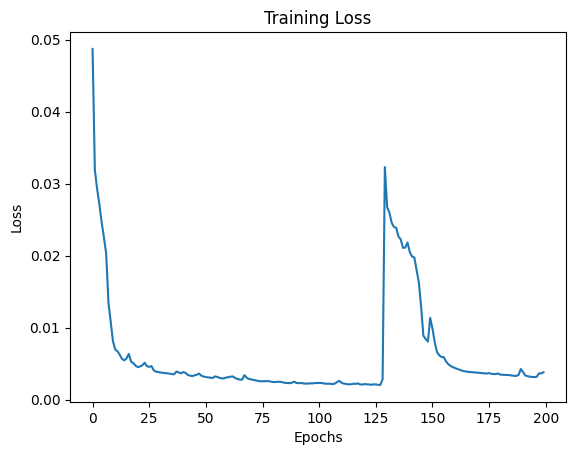

In [70]:
# Model hyperparameters
input_size = data_x.shape[1]  # Number of features at each time step
hidden_size = 50  # LSTM hidden state size
output_size = 1  # Single value for regression

# Instantiate the model
model = LSTMRegressor(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
batch_size = 32

train_loss_history = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))  # Shuffle the training data
    epoch_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        # Get the batch
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / (X_train.size(0) // batch_size)
    train_loss_history.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

# Plot training loss
plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Test Loss: 0.0035


<Figure size 1000x600 with 0 Axes>

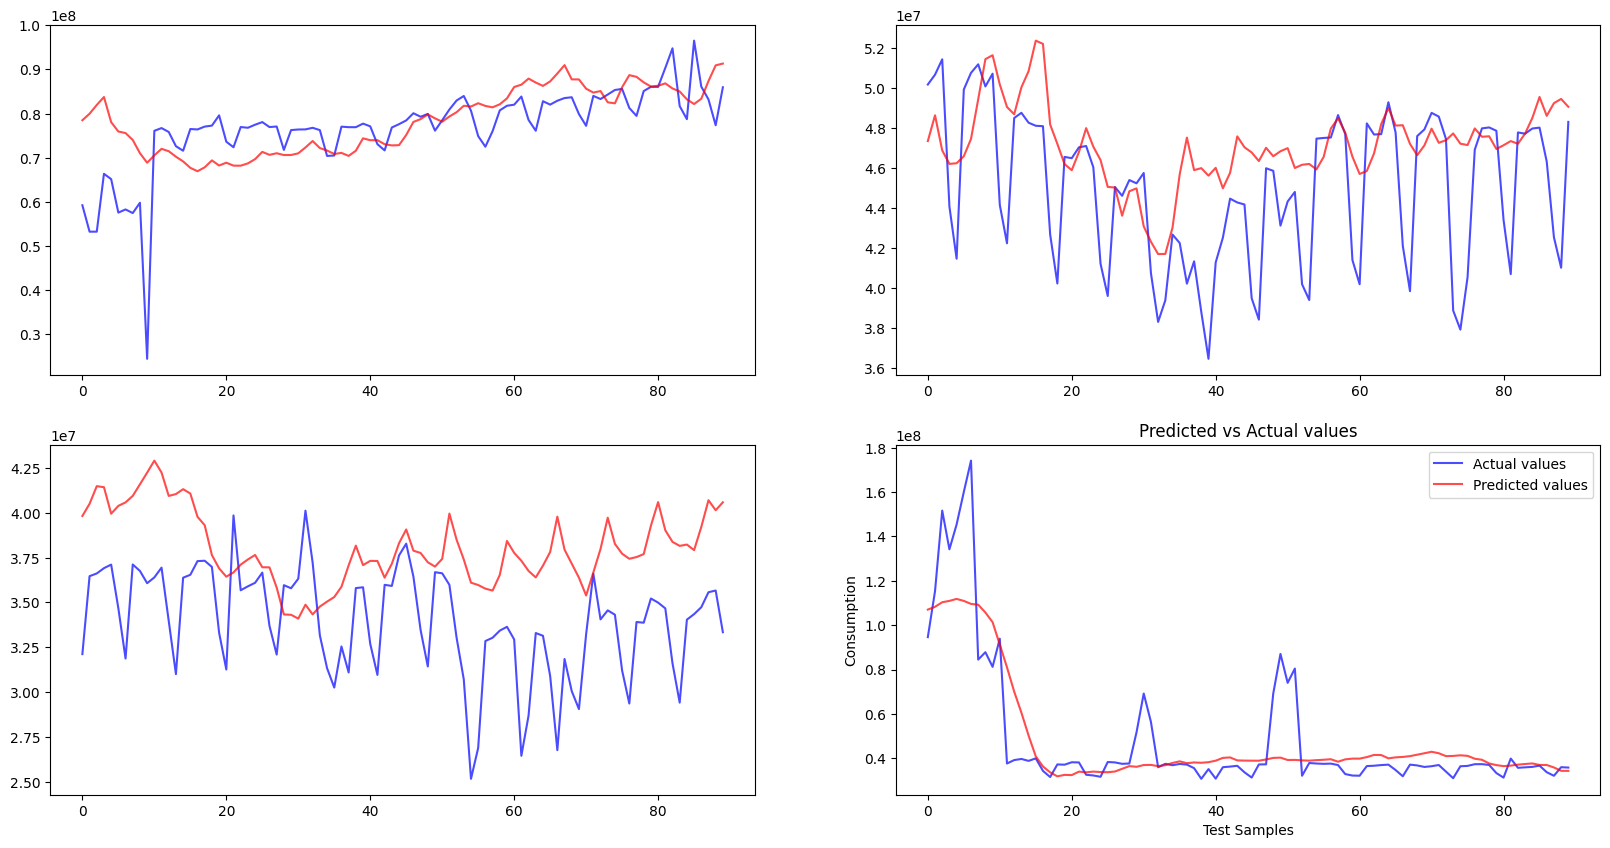

In [72]:
# Evaluate the model on test data
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).squeeze() 
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

    test_predictions_rescaled = scaler_y.inverse_transform(test_predictions.detach().numpy())
    test_rescaled = scaler_y.inverse_transform(y_test.detach().numpy())

    # Visualize the results: Predicted vs Actual
    plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

    for i in range(2):
        for j in range(2):
            idx = i + j*7
            # Plotting the predicted values against the actual values
            ax[i][j].plot(test_rescaled[idx], label='Actual values', color='blue', alpha=0.7)
            ax[i][j].plot(test_predictions_rescaled[idx], label='Predicted values', color='red', alpha=0.7)
    
    # Adding labels and title
    plt.title('Predicted vs Actual values')
    plt.xlabel('Test Samples')
    plt.ylabel('Consumption')
    plt.legend()

    # Show the plot
    plt.show()